<a href="https://colab.research.google.com/github/SabhyaGrover/ML-Coursework/blob/main/ml_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 2**

The Marketing department of Adventure Works Cycles wants to increase sales by targeting specific
customers for a mailing campaign. The company's database contains a list of past customers and a list of
potential new customers. By investigating the attributes of previous bike buyers, the company hopes to
discover patterns that they can then apply to potential customers. They hope to use the discovered patterns
to predict which potential customers are most likely to purchase a bike from Adventure Works Cycles.


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command
%pwd

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

In [ ]:
# Downloading the dataset 
!kaggle datasets download -d jahias/microsoft-adventure-works-cycles-customer-data
!ls

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
sample_data


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  microsoft-adventure-works-cycles-customer-data.zip
replace AWCustomers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AWSales.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AWTest-Classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AWTest-Regression.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# **Part 1: Based on Feature Selection, Cleaning, and Preprocessing to Construct an Input from Data Source**

In [ ]:
import pandas as pd
# Reading Data from CSV files
customerData = pd.read_csv('AWCustomers.csv')
salesData = pd.read_csv('AWSales.csv')
# BikeBuyer is the target column

In [ ]:
# Combining both the Datasets to analyse the features
dataset = pd.merge(customerData,salesData,how='inner',on='CustomerID')
dataset.nunique()
dataset.shape

(18361, 26)

**a.) Examine the values of each attribute and Select a set of attributes only that would affect to predict
future bike buyers to create your input for data mining algorithms. Remove all the unnecessary
attributes. (Select features just by analysis).**

In [ ]:
print(dataset['AddressLine2'].isna().sum())
print(dataset['Suffix'].isna().sum())
print(dataset['Title'].isna().sum())
dataset.nunique(axis=0)

18050
18358
18260


CustomerID              18355
Title                       5
FirstName                 670
MiddleName                 44
LastName                  375
Suffix                      1
AddressLine1            12742
AddressLine2              166
City                      269
StateProvinceName          54
CountryRegionName           6
PostalCode                323
PhoneNumber              8836
BirthDate                8230
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             6
NumberChildrenAtHome        4
TotalChildren               4
YearlyIncome            15356
LastUpdated                 2
BikeBuyer                   2
AvgMonthSpend            1803
dtype: int64

**b.) Create a new Data Frame with the selected attributes only.**

In [ ]:
#convert BirthDate to Age
for i, row in dataset.iterrows():
  age = 2021 - int(dataset.loc[i, 'BirthDate'][:4])
  dataset.at[i, 'BirthDate'] = age
dataset.rename(columns={'BirthDate':'Age', 'CountryRegionName': 'Country'}, inplace=True)
dataset.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,Country,PostalCode,PhoneNumber,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0115,34,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,Canada,V9B 2C3,787-555-0136,49,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,United States,91791,120-555-0111,36,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,United Kingdom,L4 4HB,1 (11) 500 555-0167,44,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,Germany,59368,1 (11) 500 555-0113,46,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06,1,55.41


In [ ]:
# As MiddleName,Title, Suffix are NULL in most of the row entries, 
# and There are about unique 12k entries in Address section, 
# 18k unique entries in CustomerID, PostalCode ,PhoneNumber,City and Last Updated 
# hence , these features wouldn't help the model much
# There is already a Total Children column, 
# Hence NumberChildrenAtHome will be dropped

dataset = dataset.drop(columns=["FirstName","MiddleName","LastName","CustomerID","PostalCode","PhoneNumber","LastUpdated", "Title", "Suffix", "AddressLine2","AddressLine1","NumberChildrenAtHome","City","StateProvinceName"])
dataset.nunique(axis=0)

Country                6
Age                   70
Education              5
Occupation             5
Gender                 2
MaritalStatus          2
HomeOwnerFlag          2
NumberCarsOwned        6
TotalChildren          4
YearlyIncome       15356
BikeBuyer              2
AvgMonthSpend       1803
dtype: int64

**c.) Determine a Data value type (Discrete, or Continuous, then Nominal, Ordinal, Interval, Ratio) of
each attribute in your selection to identify preprocessing tasks to create input for your data mining.**

In [ ]:
print(dataset.columns)

Index(['Country', 'Age', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'TotalChildren', 'YearlyIncome',
       'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')



- **Country** : Discrete, Categorical Nominal
- **Age** : Discrete,Numerical, Ratio
- **Education**: Discrete,Categorical Ordinal
- **Occupation**: Discrete, Categorical Nominal
- **Gender**: Discrete, Categorical Nominal
- **Marital Status**: Discrete, Categorical Nominal
- **HomeOwnerFlag**: Discrete, Categorical Ordinal
- **NumberCarsOwned**: Discrete, Categorical Ordinal
- **TotalChildren**: Discrete, Categorical Ordinal
- **YearlyIncome**: Continuous,Numerical and Ratio 
- **AvgMonthSpend**: Continuous,Numerical and Ratio

# **Part II: Data Preprocessing and Transformation**

Depending on the data type of each attribute, transform each object from your preprocessed data.
Use all the data rows (~= 18000 rows) with the selected features as input to apply all the tasks below, do
not perform each task on the smaller data set that you got from your random sampling result.

**(a) Handling Null values**

In [ ]:
# dataset = dataset.drop(columns=["MiddleName"])
dataset.isnull().values.any()
# None NULL values present

False

**(b) Normalization, (d) Standardization**

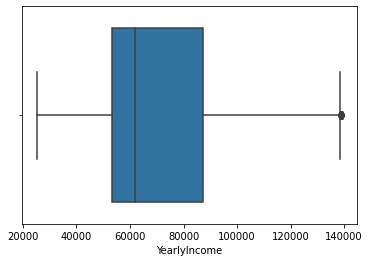

In [ ]:
# Check Outliers
import seaborn as sns
sns.boxplot(x=dataset['YearlyIncome'])

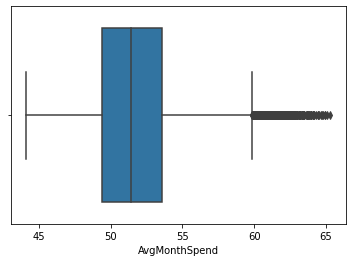

In [ ]:
sns.boxplot(x=dataset['AvgMonthSpend'])

In [ ]:
# Normalization of YearlyIncome, AvgMonthSpend
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()
scaled_income = min_max_scalar.fit_transform(dataset[['YearlyIncome']].values)
scaled_spend = min_max_scalar.fit_transform(dataset[['AvgMonthSpend']].values)
dataset['YearlyIncome'] = scaled_income
dataset['AvgMonthSpend'] = scaled_spend
dataset.rename(columns={'YearlyIncome':'YearlyIncome_scaled', 'AvgMonthSpend':'AvgMonthSpend_scaled'}, inplace=True)
dataset.head()


,Country,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome_scaled,BikeBuyer,AvgMonthSpend_scaled
0,Australia,34,Bachelors,Clerical,M,M,1,3,1,0.496842,1,0.324210
1,Canada,49,Partial College,Clerical,M,M,1,2,2,0.489453,1,0.425201
2,United States,36,Bachelors,Clerical,F,S,0,3,0,0.536172,1,0.470977
3,United Kingdom,44,Partial College,Skilled Manual,M,M,1,2,2,0.317083,1,0.605474
4,Germany,46,Partial College,Skilled Manual,M,S,1,1,0,0.231958,1,0.533742


**(c) Discretization (Binning) on Continuous attributes or Categorical Attributes with too many different
values**

In [ ]:
# Discretization or Binning on continuous attributes.
# We perform binning on Age. 
# Making two categories of young and old 
# based on the boxplot

#Find Maximum Minimum Value
min_value = dataset['Age'].min()
max_value = dataset['Age'].max()
print (min_value)
print(max_value)

#Since we have 2 groups, we need 3 intervals
labels = ['young','old']
dataset['Age'] = pd.qcut(dataset['Age'], q=2, precision=1, labels=labels)

21
91


          Country    Age  ... BikeBuyer AvgMonthSpend_scaled
0       Australia  young  ...         1             0.324210
1          Canada    old  ...         1             0.425201
2   United States  young  ...         1             0.470977
3  United Kingdom    old  ...         1             0.605474
4         Germany    old  ...         1             0.533742

[5 rows x 12 columns]


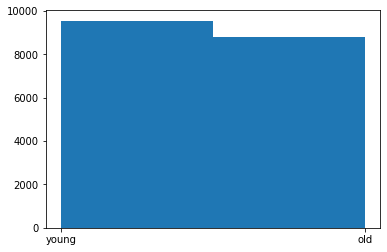

In [ ]:
import matplotlib.pyplot as plt
print(dataset.head())
plt.hist(dataset['Age'], bins=2)
plt.show()

**(e) Binarization (One Hot Encoding)**

In [ ]:
#Manually Encoding Label for Education feature
edu_dict = {'Partial High School':0,'High School':1,'Partial College':2,'Bachelors':3,'Graduate Degree':4}
for i, row in dataset.iterrows():
    ed = dataset.loc[i,'Education']
    dataset.at[i,'Education'] = edu_dict[ed]

In [ ]:
#One Hot Encoding of Nominal Features: Gender, Marital Satus, Country, Occupation
dataset['Age_'] = pd.get_dummies(dataset.Age,drop_first=True)
dataset['Gender_'] = pd.get_dummies(dataset.Gender,drop_first=True)
dataset['MaritalStatus_'] = pd.get_dummies(dataset.MaritalStatus,drop_first=True)
df1 = pd.get_dummies(dataset.Country,drop_first=True)
df2 = pd.get_dummies(dataset.Occupation,drop_first=True)
dataset = pd.concat([dataset, df1, df2], axis=1)

In [ ]:
dataset.drop(columns = ['Gender','Country','Age','Occupation','MaritalStatus'],inplace=True)
dataset

,Education,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome_scaled,BikeBuyer,AvgMonthSpend_scaled,Age_,Gender_,MaritalStatus_,Canada,France,Germany,United Kingdom,United States,Management,Manual,Professional,Skilled Manual
0,3,1,3,1,0.496842,1,0.324210,0,1,0,0,0,0,0,0,0,0,0,0
1,2,1,2,2,0.489453,1,0.425201,1,1,0,1,0,0,0,0,0,0,0,0
2,3,0,3,0,0.536172,1,0.470977,0,0,1,0,0,0,0,1,0,0,0,0
3,2,1,2,2,0.317083,1,0.605474,1,1,0,0,0,0,1,0,0,0,0,1
4,2,1,1,0,0.231958,1,0.533742,1,1,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,4,0,1,2,0.242065,0,0.190656,0,0,0,0,0,0,0,1,0,0,0,1
18357,3,0,2,0,0.312781,1,0.289287,0,0,1,0,0,0,0,0,0,0,0,1
18358,2,0,2,0,0.232442,1,0.257669,0,0,1,0,0,0,0,1,0,0,0,1
18359,1,0,0,0,0.543121,0,0.345446,0,0,1,1,0,0,0,0,0,0,0,0


**Part III: Calculating Proximity /Correlation Analysis of two features**

Make sure each attribute is transformed in a same scale for numeric attributes and Binarization for each
nominal attribute, and each discretized numeric attribute to standardization. Make sure to apply a correct
similarity measure for nominal (one hot encoding)/binary attributes and numeric attributes respectively.

**(a) Calculate Similarity in Simple Matching, Jaccard Similarity, and Cosine Similarity between two
following objects of your transformed input data.**

In [ ]:
from math import*
def square_rooted(x):
  return round(sqrt(sum([a*a for a in x])),3)

def SMC(x,y):
  x,y = x.values, y.values
  return np.sum(x==y)/len(x)

def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)

def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)

In [ ]:
import numpy as np
print('Simple Matching Coefficient:',SMC(dataset['HomeOwnerFlag'], dataset['Gender_']))
print('Jaccard Similarity Score:',jaccard_similarity(dataset['HomeOwnerFlag'], dataset['Age_']))
print('Cosine Similarity Score:',cosine_similarity(dataset['HomeOwnerFlag'], dataset['TotalChildren']))

Simple Matching Coefficient: 0.5061271172594085
Jaccard Similarity Score: 1.0
Cosine Similarity Score: 0.794


**(b) Calculate Correlation between two features Commute Distance and Yearly Income**

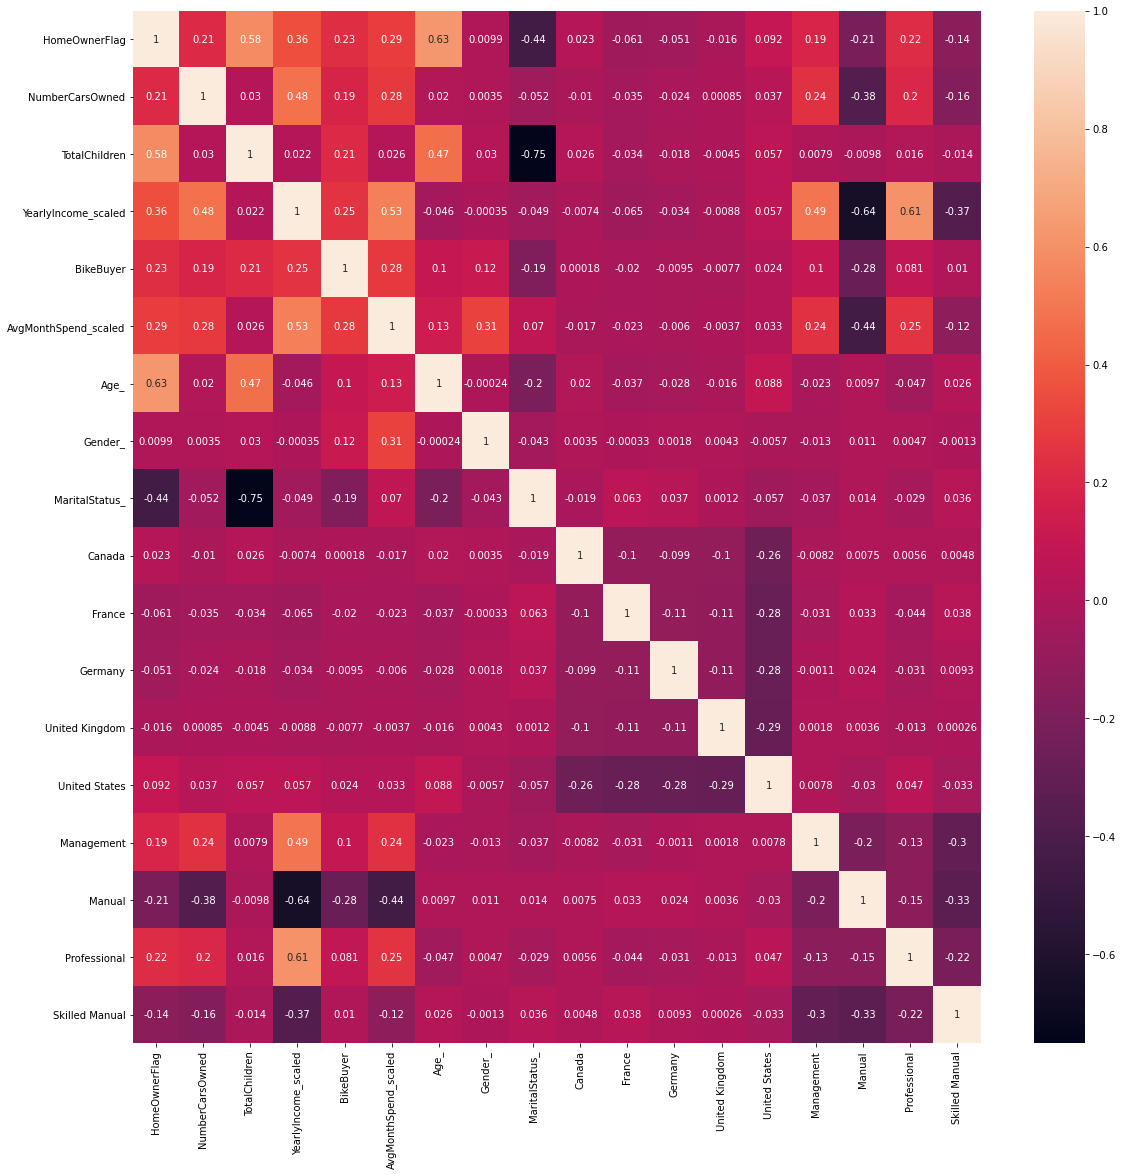

In [ ]:
# Analysis using HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Get Correlation Matrix
corrmat = dataset.corr()
#Plotting HeatMap
plt.figure(figsize = (19,19))
sns.heatmap(corrmat,annot = True)



---

